In [ ]:
!pip install sentinelhub --upgrade

     |████████████████████████████████| 184kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 8.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.0.4-cp36-none-any.whl size=187572 sha256=128cdaaf4c0e8aac0fb9e71dfa567861ff2c39251a50c4e0ae808438166158d6
  Stored in directory: /root/.cache/pip/wheels/94/b9/7f/d67a9c14ba62aded84d7c32d5cf89affa27e337ace70d30fbb
  Created wheel for utm: filename=utm-0.5.0-cp36-none-any.whl size=5903 sha256=612b6eea3fe64bd849101108d2ad0dc1717dda0e86d5948d018f8cb05b29d509
  Stored in directory: /root/.cache/pip/wheels/22/85/c2/314ffed39b8e02ca623e9b7d2ad7fcf3f8544a0e77c096be76
Successfully built sentinelhub utm


In [ ]:
import sentinelhub

In [ ]:
print(dir(sentinelhub))

['AwsConstants', 'AwsDownloadClient', 'AwsDownloadFailedException', 'AwsProduct', 'AwsProductRequest', 'AwsTile', 'AwsTileRequest', 'BBox', 'BBoxCollection', 'BBoxSplitter', 'CRS', 'CustomGridSplitter', 'CustomUrlParam', 'DataSource', 'DownloadClient', 'DownloadFailedException', 'DownloadRequest', 'FisRequest', 'Geometry', 'GeopediaFeatureIterator', 'GeopediaImageRequest', 'GeopediaSession', 'GeopediaWmsRequest', 'HistogramType', 'MimeType', 'OsmSplitter', 'SHConfig', 'SHConstants', 'SafeProduct', 'SafeTile', 'SentinelHubDownloadClient', 'SentinelHubRequest', 'SentinelHubSession', 'ServiceType', 'TestCaseContainer', 'TestSentinelHub', 'TileSplitter', 'UtmGridSplitter', 'UtmZoneSplitter', 'WcsRequest', 'WebFeatureService', 'WmsRequest', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'areas', 'aws', 'aws_safe', 'bbox_to_dimensions', 'bbox_to_resolution', 'config', 'constants', 'create_parent

In [ ]:
"""
Utilities used by example notebooks
"""
import matplotlib.pyplot as plt
import numpy as np


def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
from sentinelhub import SHConfig

# In case you put the credentials into the configuration file you can leave this unchanged

CLIENT_ID = 'a7bcd5a5-eb19-4860-af3f-b11e6489eb51'
CLIENT_SECRET = 'te2p4oH</!Ik$ZJ~AJKVud(M4][MDsd8G*o+M4Yy'

config = SHConfig()

if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET

if config.sh_client_id == '' or config.sh_client_secret == '':
    print("Warning! To use Sentinel Hub services, please provide the credentials (client ID and client secret).")


import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, \
    DataSource, bbox_to_dimensions, DownloadRequest

#from utils import plot_image
                          #Lng   Lat
#betsiboka_coords_wgs84 = [46.16, 16.15, 46.51, -15.58]
betsiboka_coords_wgs84 = [-73.7, 40.6, -73.9, 40.9]
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {betsiboka_size} pixels')

Image shape at 60 m resolution: (274, 559) pixels


In [ ]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_source=DataSource.SENTINEL2_L1C,
            #time_interval=('2020-06-12', '2020-06-13'),
            time_interval=('2019-06-12', '2019-07-13')
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

In [ ]:
true_color_imgs = request_true_color.get_data()

In [ ]:
print(f'Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.')
print(f'Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}')

Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (559, 274, 3)


Image type: uint8


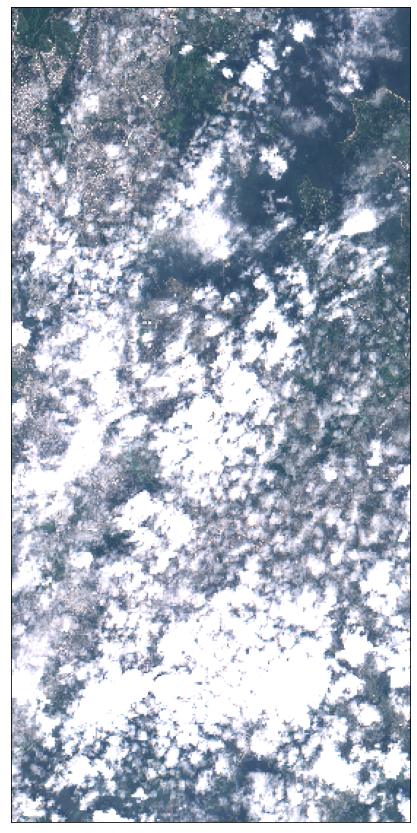

In [ ]:
image = true_color_imgs[0]
print(f'Image type: {image.dtype}')

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5/255, clip_range=(0,1))